# OVERPARAMETRIZATION THESIS

Deep Double Descent was proven to be related to noise (or actually to model misconfiguration) here:<br>
https://openai.com/research/deep-double-descent

**The goal is to reproduce this behaviour shown in the paper and to check if using noise-robust losses it is actually reduced.**


*Thesis student*: Carmignani Federico (1845479)

*Tutors*: Siciliano Federico and Bucarelli Maria Sofia

*Professor:* Silvestri Fabrizio

## Preparation phase


1.   Installation from GitHub
2.   Connection to Google Drive
3.   Paths definition and imports

There are 2 possibilities for using this notebook:

*   Run locally

In this case we have 2 chances:

1.   Download through pip install from GitHub, then import it using import keyword and use it.
2.   Download the code locally from GitHub and from the notebook define the paths to these sources (code to be adjusted).

*   Run in Colab

1.   Download through pip install from GitHub, then import it using import keyword and use it (HERE).
2.    Download the code locally from GitHub into the src folder in Google Drive and from the notebook define the paths to these sources (code to be adjusted).





### Connection to Google Drive
The code is a Python snippet designed to connect Google Drive to a Google Colab notebook. It checks if connect_to_drive is set to True, and if so, it imports the necessary library and mounts Google Drive to the /content/gdrive directory using Google Colab's drive.mount() function. The user will be prompted to authorize the connection through a popup window.

In [ ]:
# Set connect_to_drive to True if you want to connect to Google Drive.
connect_to_drive = True

# If connect_to_drive is True, connect to Google Drive using the google.colab library.
# This will prompt a popup window where you'll need to authorize access to your Google Drive.
if connect_to_drive:
    from google.colab import drive

    # Mount the Google Drive to the '/content/gdrive' directory in the Colab environment.
    # The 'force_remount=True' parameter ensures that if the Drive is already mounted,
    # it will be remounted to refresh the connection.
    drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


### Installation of packages
This code block installs Python packages and libraries using the pip package manager. It checks the value of the connect_to_drive variable, and if it is True, the code assumes that the user wants to install the specified packages (otherwise commands assumed done via console manually). Here's a breakdown of the installation process:

git+https://github.com/siciliano-diag/data_utils.git: This command installs a Python package called data_utils from the GitHub repository located at https://github.com/siciliano-diag/data_utils.git. The git+ prefix tells pip to install the package directly from the specified Git repository.

git+https://github.com/siciliano-diag/exp_utils.git: This command installs another Python package named exp_utils from the GitHub repository located at https://github.com/siciliano-diag/exp_utils.git.

git+https://github.com/siciliano-diag/torch_utils.git: This command installs the Python package torch_utils from the GitHub repository located at https://github.com/siciliano-diag/torch_utils.git.

pip install pytorch_lightning: Finally, this command installs the pytorch_lightning library, which is a popular and easy-to-use PyTorch wrapper that simplifies the process of training deep learning models.

Overall, this code is meant to set up the required dependencies for a specific project, and by setting connect_to_drive to True, the user can conveniently install these packages in their environment. Note that the installation process might take a few moments to complete depending on the network speed and the size of the packages.

In [ ]:
if connect_to_drive:
    # Install github code
    !pip install git+https://github.com/siciliano-diag/data_utils.git
    !pip install git+https://github.com/siciliano-diag/exp_utils.git
    !pip install git+https://github.com/siciliano-diag/torch_utils.git

    # Install the pytorch_lightning library
    !pip install pytorch_lightning


  Cloning https://github.com/siciliano-diag/data_utils.git to /tmp/pip-req-build-2y595psl
  Running command git clone --filter=blob:none --quiet https://github.com/siciliano-diag/data_utils.git /tmp/pip-req-build-2y595psl
  Resolved https://github.com/siciliano-diag/data_utils.git to commit da51da931b3b1a906d581deb32b04b9f3b3d3062
  Preparing metadata (setup.py) ... done
  Created wheel for data-utils: filename=data_utils-0.0.1-py3-none-any.whl size=7424 sha256=b3df6477992f2e0f0fe408888813b3e7c436290ac08535316cdae97256ff484c
  Stored in directory: /tmp/pip-ephem-wheel-cache-_vbsn4wf/wheels/70/cc/96/7a683f096a51bcfaddeec3a889d23cf7af63685e8956ca0290
Successfully built data-utils
  Cloning https://github.com/siciliano-diag/exp_utils.git to /tmp/pip-req-build-1y_f71i8
  Running command git clone --filter=blob:none --quiet https://github.com/siciliano-diag/exp_utils.git /tmp/pip-req-build-1y_f71i8
  Resolved https://github.com/siciliano-diag/exp_utils.git to commit 0f37f8e4fa47279ff429420d

### Imports

The script imports the following libraries and modules:

- numpy (as np): Used for numerical computations, particularly array manipulation and mathematical operations.
- pandas (as pd): Used for data manipulation and analysis, providing powerful data structures and tools.
- matplotlib.pyplot (as plt): A sub-library of Matplotlib, used for creating various types of data visualizations, such as plots and charts.
- os: Allows interaction with the operating system, such as working with files, directories, and environment variables.
- sys: Provides access to system-specific parameters and functions, enabling control over the Python runtime environment.
- torch: The core library for PyTorch, which is a widely used deep learning framework in Python for building and training neural networks.
- The two commented-out import statements, from copy import deepcopy and import pickle, suggest that these functionalities might have been used in the past but are currently not being utilized in the script.

In [ ]:
# Put all imports here

# Import NumPy library, commonly used for numerical computations and array manipulation.
import numpy as np

# Import pandas library, widely used for data manipulation and analysis.
import pandas as pd

# Import matplotlib.pyplot from Matplotlib, used for creating data visualizations and plotting.
import matplotlib.pyplot as plt

# The following imports are commented out and not currently in use, but they are left for reference:
# #from copy import deepcopy: This import statement would bring in the 'deepcopy' function from the 'copy' module,
# which allows creating a deep copy of objects to avoid modifying the original data accidentally.

# #import pickle: This import statement would allow working with the pickle module, which is used for
# serializing and deserializing Python objects, i.e., converting objects to a byte stream and vice versa.

# Import os module, used for interacting with the operating system, such as managing files and directories.
import os

# Import sys module, used to access system-specific parameters and functions.
import sys

# Import torch library, which is the main library for working with PyTorch, a popular deep learning framework.
import torch
from torchvision.models.resnet import BasicBlock
from torch import nn
import pytorch_lightning as pl

# Import pprint function from the pprint module, used for pretty-printing data structures.
from pprint import pprint

# Import deepcopy for object copies
from copy import deepcopy


### Definition of paths
This is to define the paths to store data, configurations, plots, models and results.

Locally if Google Drive is not connected.

In [ ]:
# Define the project folder path and set it to the parent directory of the current location.
project_folder = "../" # Used if the notebook is run locally to define the right paths

# If connect_to_drive is True, update the project_folder to point to the specific folder in Google Drive.
if connect_to_drive:
    project_folder = "/content/gdrive/Shareddrives/Carmignani - Overparametrization thesis" #Name of Shared Drive folder
    #project_folder = "/content/gdrive/MyDrive/<MyDriveName>" #Name of MyDrive folder

# The cfg_folder will contain hyperparameter configurations.
# It is located inside the project_folder.
cfg_folder = os.path.join(project_folder, "cfg")

# The data_folder will contain raw and preprocessed data.
# It is also located inside the project_folder.
data_folder = os.path.join(project_folder, "data")

# The raw_data_folder will contain the raw data.
# It is a subfolder within the data_folder.
raw_data_folder = os.path.join(data_folder, "raw")

# The processed_data_folder will contain the preprocessed data.
# It is another subfolder within the data_folder.
processed_data_folder = os.path.join(data_folder, "processed")

# The source_folder will contain all essential source code.
# It is located inside the project_folder.
source_folder = os.path.join(project_folder, "src")

# The out_folder will contain all outputs, such as models, results, plots, etc.
# It is also located inside the project_folder.
out_folder = os.path.join(project_folder, "out")


### Packages:

data_utils: A package that provides utilities and functions for working with data, possibly for data preprocessing, augmentation, or data loading.

exp_utils: A package that contains utilities and tools for managing and organizing machine learning experiments, such as logging experiment results and managing experiment configurations.

torch_utils: A package that likely provides utility functions and classes for working with PyTorch, a popular deep learning library.

pytorch_lightning: A separate library that simplifies the process of training PyTorch models by abstracting away boilerplate code and providing useful features for distributed training, GPU acceleration, and more.

In [ ]:
# Importing all packages after GitHub download
import data_utils, exp_utils, torch_utils

### Import local code from the Drive

This code snippet deals with importing modules from a custom source folder, rather than installing packages via pip install from external sources like GitHub as before.

*Differences from installing via pip install from GitHub:*

  When you use pip install to install packages from GitHub or any other source, it installs the package and its dependencies globally or within a virtual environment. The installed package becomes part of Python's standard search path, and you can import the package from anywhere in your code without explicitly manipulating sys.path. The installed package can also be accessed by other projects or scripts running in the same Python environment.

  On the other hand, the code in the provided snippet deals with importing modules from a custom source folder that might not be part of the global Python path. It allows importing specific modules from the project_folder without a formal installation step. This approach can be useful during development when you want to work with local code changes and test them without the need for package installation and updates. However, it may require more manual management and is typically used for custom development purposes rather than using pre-packaged libraries from external sources.

In [ ]:
# To import from src of Google drive a utils library (now not present)

# Attach the source folder to the start of sys.path
sys.path.insert(0, project_folder)
print(sys.path)  # View the path and verify

# Import from src directory: to be used if we want to import utilitis from src folder
# from src import utils

# Change the current working directory to source_folder
os.chdir(source_folder)

['/content/gdrive/Shareddrives/Carmignani - Overparametrization thesis', '/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/tmp/tmp_nqb6cu7']


## Main
1.   Load configuration
2.   Data preparation
3.   Model
4.   Experiment check
5.   Training
6.   Test
7.   Save experiment

### Load configuration
The code loads a configuration using the 'load_configuration' function from the 'exp_utils.cfg' module. The loaded configuration object is stored in the 'cfg' variable.

*An experiment with a name ("experiment") can be used for different configurations, when a change is not affecting the configuration parameters but it is a code-based change, then create a new experiment name*.

In [ ]:
# Load the configuration using the 'load_configuration' function from the 'exp_utils.cfg' module
cfg = exp_utils.cfg.load_configuration()

cfg  # Display the loaded configuration object

{'__exp__': {'name': 'september_9',
  'project_folder': '../',
  'key_len': 16,
  'key_prefix': '',
  '__nosave__': {'model.loader_params.num_workers': None,
   'model.loader_params.persistent_workers': None,
   'model.trainer_params.accelerator': None,
   'model.trainer_params.enable_checkpointing': None,
   'model.trainer_params.logger': None,
   'model.trainer_params.callbacks.0.ModelCheckpoint.dirpath': None,
   'model.trainer_params.callbacks.0.ModelCheckpoint.filename': None}},
 'data': {'name': 'MNIST',
  'source': 'torchvision',
  'noise': False,
  'noise_level': 0.3,
  'merge_before_split': False,
  'split_keys': {'train_x': ['train_x', 'val_x'],
   'train_y': ['train_y', 'val_y']},
  'test_sizes': [0.2],
  'split_random_state': 21094,
  'one_hot_encode': True,
  'scaling': 'MinMax'},
 'model': {'name': 'resnet18',
  'num_parameters': [1, 2, 4, 8, 16, 32, 64],
  'torchvision_params': {'weights': None},
  'optimizer': {'name': 'Adam', 'params': {'lr': 0.1}},
  'loss': 'CrossEnt

### Data Preparation and Label Noise Injection

This code segment carries out the following steps:

1. Updates the "data_folder" configuration in the `cfg` dictionary with the value of the 'raw_data_folder' variable.
2. Loads data using the configuration settings from `'cfg["data"]'`.
3. Displays the shape of the 'train_x' data array, which represents the input training images.
4. Provides an example of a one-hot encoded class label from the 'train_y' array.
5. Determines whether the dataset is MNIST and if noise and one-hot encoding are enabled based on the configuration settings.
6. If the dataset is MNIST and both noise and one-hot encoding are enabled, it introduces label noise to the dataset. The amount of noise is determined by the 'noise_level' parameter from the configuration. For each training label, there is a probability defined by 'noise_level' that the label will be changed (flipped) to a randomly selected class.
7. Prepares data loaders for training using the loaded data and specified loader parameters from 'cfg["model"]["loader_params"]'.
8. Displays an instance of an input image along with its original one-hot encoded class label. The specific image is chosen based on the `example_index` variable. The grayscale image and its corresponding label are displayed using `matplotlib.pyplot.imshow()`. The label is shown as the title, and the axes are turned off for better visualization.


Shape of train data:  torch.Size([48000, 1, 28, 28])
Example of one-hot encoding:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


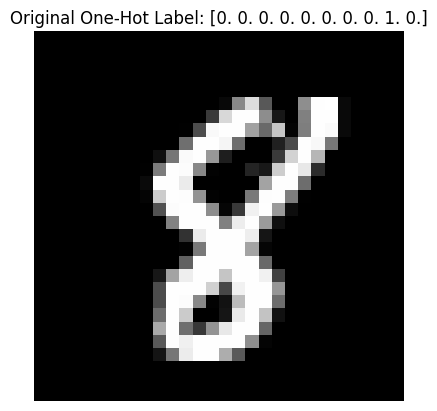

In [ ]:
# Update the "data_folder" configuration value with the 'data_folder' variable
cfg["data"]["data_folder"] = raw_data_folder #FS: in raw is better, cause this is raw data

# Load data using the configuration settings from 'cfg["data"]'
data = data_utils.data.load_data(**cfg["data"])

# Print the shape of the 'train_x' data
print("Shape of train data: ", data['train_x'].shape)
print("Example of one-hot encoding: ", data['train_y'][1])  # Print an example of a one-hot encoded class label

# Check noise is enabled in cfg
noise_enabled = cfg["data"].get("noise", False)

# Add noise if both MNIST dataset, noise, and one-hot encoding are enabled
if noise_enabled:
    assert cfg["data.name"]=="MNIST", "Noise enabled just for MNIST"
    assert cfg["data.one_hot_encode"]==True, "Noise enabled just for one-hot encoded data"

    noise_level = cfg["data"].get("noise_level", 0.1)  # Default noise level is 0.1

    print("Printing some examples of noise added..")
    for i in range(len(data['train_y'])):
        if np.random.rand() < noise_level:
            # Create a random one-hot encoded class label
            random_class = np.zeros(10)
            random_class[np.random.randint(0, 10)] = 1
            print("Old label: ", data['train_y'][i])
            data['train_y'][i] = random_class
            print("New label: ", data['train_y'][i],"\n")

# Prepare data loaders for training using the loaded data and specified loader parameters
loaders = torch_utils.preparation.prepare_data_loaders(data, cfg["model"]["loader_params"])

# Print an example of an input image and its original one-hot encoded class label
example_index = 5  # You can change this to view different examples
example_image = data['train_x'][example_index].squeeze()
original_one_hot_label = data['train_y'][example_index]

# Display the image and original one-hot encoded class label
plt.imshow(example_image, cmap='gray')
plt.title(f"Original One-Hot Label: {original_one_hot_label}")
plt.axis('off')
plt.show()


### Model parameters
This code snippet manages the configuration and initialization of the neural network model:

The first line updates the "in_channels" value in the model configuration. This update ensures that the number of input channels matches the number of channels in the training images. It aligns the model's input layer with the image data's channel dimension.

The second line updates the "out_features" value in the model configuration. This update ensures that the number of output features (classes) matches the number of classes in the training labels. It ensures the model's output layer aligns with the classes in the data.

In [ ]:
# Update the number of input channels in the model configuration based on the number of channels in the training data
cfg["model"]["in_channels"] = data["train_x"].shape[1]

# Update the number of output features (classes) in the model configuration based on the number of features in the training labels
cfg["model"]["out_features"] = data["train_y"].shape[1]

In [ ]:
print("Number of parameters in the model:", cfg["model"]["num_parameters"])  # Print the number of parameters level (k) specified in the config

Number of parameters in the model: [1, 2, 4, 8, 16, 32, 64]


### Change model size

We want to be able to define a family of ResNet18s of increasing size as follows. We follow the Preactivation ResNet18 architecture of He et al. (2016), using 4 ResNet blocks, each consisting of two BatchNorm-ReLU-Convolution layers. The layer widths for the 4 blocks are [k, 2k, 4k, 8k] for varying k ∈ N and the strides are [1, 2, 2, 2]. The standard ResNet18 corresponds to k = 64 convolutional channels in the first layer.

Here the configuration has the num_parameters list and for each value a new configuration is created using "sweep" and each is trained indipendently.
In this way it is like if we have a list of ResNet18 models of different size.

In [ ]:
# This function creates the main neural network model.
# It utilizes the specified torchvision architecture from the configuration
# The get_torchvision_model function is employed, and the configuration settings from cfg["model"] are passed as arguments.
# This function initializes the model using the chosen architecture and the provided custom parameters.
def get_resnet_with_specified_num_parameters(cfg):
    num_params = cfg["model"]["num_parameters"]  # Get the number of parameters level (k) specified in the config

    # Create a torchvision model based on the current configuration
    model = torch_utils.model.get_torchvision_model(**cfg["model"])

    # Modify the first convolutional layer to match the desired number of input channels
    model.conv1 = nn.Conv2d(1, num_params, kernel_size=model.conv1.kernel_size, stride=model.conv1.stride, padding=model.conv1.padding, bias=model.conv1.bias is not None)
    model.bn1 = nn.BatchNorm2d(num_params)

    in_channels = num_params

    # Loop over the different layers in the ResNet architecture
    for layer_name, multiplier in zip(['layer1', 'layer2', 'layer3', 'layer4'], [1, 2, 4, 8]):
        out_channels = num_params * multiplier
        layer = getattr(model, layer_name)

        # Loop over the blocks within the current layer
        for i, block in enumerate(layer.children()):
            if isinstance(block, BasicBlock):
                if i == 0:
                    in_channels_for_block = in_channels
                else:
                    in_channels_for_block = out_channels

                # Modify the convolutional layers and batch normalization layers within the block
                block.conv1 = nn.Conv2d(in_channels_for_block, out_channels, kernel_size=block.conv1.kernel_size, stride=block.conv1.stride, padding=block.conv1.padding, bias=block.conv1.bias is not None)
                block.bn1 = nn.BatchNorm2d(out_channels)

                block.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=block.conv2.kernel_size, stride=block.conv2.stride, padding=block.conv2.padding, bias=block.conv2.bias is not None)
                block.bn2 = nn.BatchNorm2d(out_channels)

                # Modify the downsample layers if they exist
                if block.downsample:
                    block.downsample[0] = nn.Conv2d(in_channels_for_block, out_channels, kernel_size=(1, 1), stride=block.conv1.stride, bias=False)
                    block.downsample[1] = nn.BatchNorm2d(out_channels)

        in_channels = out_channels

    # Modify the fully connected layer of the model
    model.fc = nn.Linear(in_channels, model.fc.out_features)

    return model

### Training
The training procedure emphasizing how it is necessary to place the objects within the cfg configuration and then use them to create the trainer, using a new variable to retain both the YAML configuration with values and the one with the objects in place.

Here we are going to define:


1.   Callbacks

  *   Early Stopping
  *   Model Checkpoint


2.   Logger
  *   CSV Logger

Then we are going to define, according to the actual configuration:


1.   Loss Function


2.   Optimizer

After, let's create the final model set up and start training it!

In [ ]:
def create_and_train_model(cfg, main_module, loaders, experiment_id):
    # Set experiment_id in trainer_params in the configuration of the trainer
    trainer_params = torch_utils.preparation.prepare_experiment_id(cfg["model"]["trainer_params"], experiment_id)

    # Prepare callbacks and logger using the prepared trainer_params
    trainer_params["callbacks"] = torch_utils.preparation.prepare_callbacks(trainer_params)
    trainer_params["logger"] = torch_utils.preparation.prepare_logger(trainer_params)

    # Prepare the trainer using the prepared trainer_params
    trainer = torch_utils.preparation.prepare_trainer(**trainer_params)

    # Prepare the loss function using configuration from cfg
    loss = torch_utils.preparation.prepare_loss(cfg["model"]["loss"])

    # Prepare the optimizer using configuration from cfg
    optimizer = torch_utils.preparation.prepare_optimizer(**cfg["model"]["optimizer"])

    # Prepare the metrics using configuration from cfg
    metrics = torch_utils.preparation.prepare_metrics(cfg["model"]["metrics"])

    # Create the model using main_module, loss, and optimizer
    model = torch_utils.process.create_model(main_module, loss, optimizer, metrics, cfg["model"]["log_params"])

    # Train the model using the prepared trainer, model, and data loaders
    torch_utils.process.train_model(trainer, model, loaders, val_key=["val","test"])

    return trainer, model


### Experiments: Multiple ResNet models
Train, test and save multiple ResNet models with different sizes (parameter k) as presented in the paper.

**Experiment check**

The goal is to use the list of models corresponding to the different sizes of ResNet18 created and for each of them create an experiment and execute it.

Each experiment is now saved in the folder "experiment" with a specific id, each experiment there is different w.r.t. the configuration, when a new folder is created it means a change in the code is done, not affecting only the configuration.

**Testing**

Test phase to obtain the metrics needed for evaluations.


**Save Experiment**

Save the experiment id with an hash in the out/exp/experiment where a file with all ids is created avoiding repetitions.

In [ ]:
# Iterate over each model and its corresponding configuration
# Loop over different values of num_params from a configuration sweep
# (cfg is updated with the current value, inside the loop. Reverts to original value after loop)
for num_params in cfg.sweep("model.num_parameters"):
    # Get the current size for num_parameters
    print("Number of parameters:", num_params, cfg["model"]["num_parameters"])

    # Get model with the specified number of parameters
    resnet_model = get_resnet_with_specified_num_parameters(cfg)

    # Get the experiment ID based on the current configuration
    exp_found, experiment_id = exp_utils.exp.get_set_experiment_id(cfg)
    print("Experiment already found:", exp_found, "----> The experiment id is:", experiment_id)
    print(cfg["__exp__.experiment_id"])
    # Check if an experiment was found
    if exp_found:
        # Print the values of exp_found (if found = true) and experiment_id
        # If an experiment was found, go to next execution and display a message
        continue
    # If no experiment was found, continue with execution

    # Create and train the model using the current configuration and ResNet model
    trainer, model = create_and_train_model(cfg, resnet_model, loaders, experiment_id)

    # # Test the trained model
    # #test_trained_model(trainer, model, loaders)
    torch_utils.process.test_model(trainer, model, loaders)

    # Save experiment and print the current configuration
    #save_experiment_and_print_config(cfg)
    exp_utils.exp.save_experiment(cfg)

    # Print completion message
    print("An execution with a model of ResNet is completed with k =", num_params)
    print("######################################################################")
    print()

Number of parameters: 1 1


INFO:lightning_fabric.utilities.seed:Global seed set to 42


Experiment already found: False ----> The experiment id is: SSwtEn89J8nnUt5P
SSwtEn89J8nnUt5P


INFO:lightning_fabric.utilities.seed:Global seed set to 42
INFO:lightning_fabric.utilities.seed:Global seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.seed:Global seed set to 42
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type             | Params
-------------------------------------------------
0 | main_module | ResNet           | 3.0 K 
1 | loss        | CrossEntropyLoss | 0     
2 | metrics     | ModuleDict       | 0     
-------------------------------------------------
3.0 K     Trainable params
0         Non-trainable params
3.0 K     Total params
0.012     T

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Exception in thread Thread-13 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 51, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 28, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reduct

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py", line 43, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py", line 571, in _fit_impl
    self._run(model, ckpt_path=ckpt_path)
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py", line 980, in _run
    results = self._run_stage()
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py", line 1023, in _run_stage
    self.fit_loop.run()
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py", line 202, in run
    self.advance()
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py", line 355, in advance
    self.epoch_loop.run(self._data_fetcher)
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/training_epoch_loop.py", line 134

TypeError: ignored